# Predicting the survival probability in a Titanic Ship

1. Import initial packages

In [1]:
import pandas as pd
import numpy as np

 Importing training data

In [2]:
df_train = pd.read_csv('Titanic-Project')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:ylabel='Frequency'>

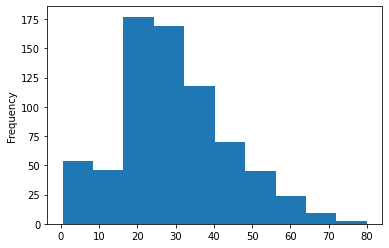

In [5]:
df_train['Age'].plot.hist()

4. Getting the mean of Age and filling up blank cells with it

In [6]:
df_train['Age'].mean()

29.69911764705882

In [7]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [8]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 5. Importing other required packages for LogisticRegression

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [10]:
x=df_train[['Age','Fare','SibSp','Pclass','Parch']]
y=df_train['Survived']

In [11]:
x

,Age,Fare,SibSp,Pclass,Parch
0,22.000000,7.2500,1,3,0
1,38.000000,71.2833,1,1,0
2,26.000000,7.9250,0,3,0
3,35.000000,53.1000,1,1,0
4,35.000000,8.0500,0,3,0
...,...,...,...,...,...
886,27.000000,13.0000,0,2,0
887,19.000000,30.0000,0,1,0
888,29.699118,23.4500,1,3,2
889,26.000000,30.0000,0,1,0


In [12]:
titanic_model = LogisticRegression()
titanic_model.fit(x,y)

LogisticRegression()

6. Using Logit function to get Regression results

In [13]:
titanic_model1=sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.601420
         Iterations 6


In [14]:
titanic_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                 0.09685
Time:                        11:55:05   Log-Likelihood:                -535.87
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 6.477e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0118      0.005     -2.469      0.014      -0.021      -0.002
Fare           0.0145      0.003      5.531      0.000       0.009       0.020
SibSp         -0.2245      0.083     -2.712      0.007      -0.387      -0.062
Pclass        -0.2622      0.058     -4.506      0.000      -0.376      -0.148
Parch          0.1916      0.100      1.919      0.055      -0.004       0.387
==============================================================================
"""

Importing the test data

In [15]:
df_test=pd.read_csv('Titanic-Project')

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 8. Getting the mean of Age and Fare and filling the blank cells with it

In [18]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [19]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [20]:
    df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
x1=df_test[['Age','Fare','SibSp','Pclass','Parch']]

In [22]:
x1

,Age,Fare,SibSp,Pclass,Parch
0,22.000000,7.2500,1,3,0
1,38.000000,71.2833,1,1,0
2,26.000000,7.9250,0,3,0
3,35.000000,53.1000,1,1,0
4,35.000000,8.0500,0,3,0
...,...,...,...,...,...
886,27.000000,13.0000,0,2,0
887,19.000000,30.0000,0,1,0
888,29.699118,23.4500,1,3,2
889,26.000000,30.0000,0,1,0


9. Using the predict function to get the survival possibility

In [23]:
prediction=titanic_model.predict(x1)

In [24]:
titanic_model.predict(x1)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,

In [25]:
output = pd.DataFrame({'PassengerId':df_test.PassengerId,'Survived':prediction})

In [26]:
output

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


In [27]:
output.to_csv('submission.csv', index=False)